In [1]:
import time
import os 

start_time = time.time() # measure run time

WORKSPACE_DIR = os.getenv('WORKSPACE_DIR')
if not os.getcwd().endswith('portfolio_py'):
    os.chdir(f'{WORKSPACE_DIR}/portfolio_py')
print(f'Current Working Directory: {os.getcwd()}')


Current Working Directory: /Users/blakeuribe/Desktop/portfolio_py


Get Back Test Dates

In [2]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
from utils.config import PROGRAM_START_DATE, PROGRAM_END_DATE, mpt_stocks_for_profit, mpt_stocks_for_sharpe
from utils.finance_utils import backtest_portfolio, MPTOptimizer

date_obj = datetime.strptime(PROGRAM_END_DATE, "%Y-%m-%d")  # Convert string to datetime objectb
backtest_end = date_obj + relativedelta(years=1)

backtest_start = PROGRAM_END_DATE


Updated on 02/04/2025 1:46

---------------------------------
finance_utils.py successfully loaded, updated last Feb. 04 2025 1:01
---------------------------------


----Begining Back Test----
Back Test starts on: 2024-01-01
Back Test ends on: 2025-01-01 00:00:00


Conduct MPT

[*********************100%***********************]  8 of 8 completed


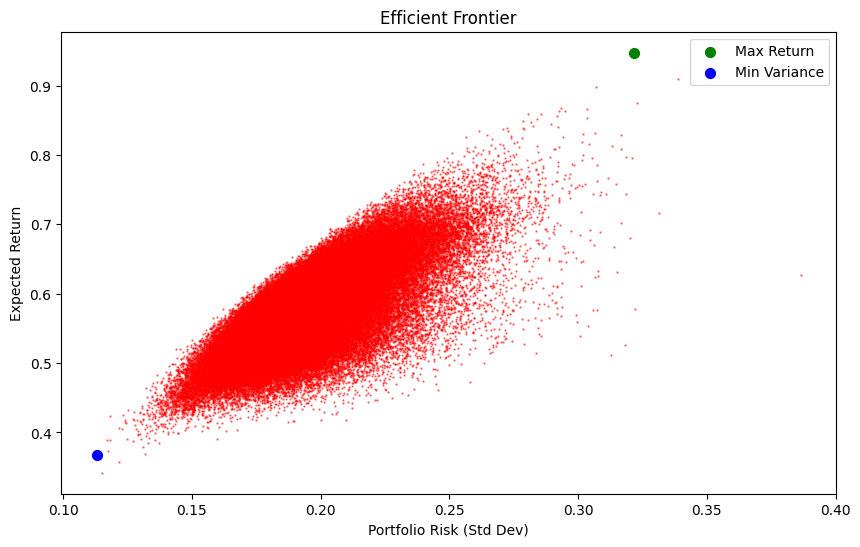

[*********************100%***********************]  8 of 8 completed

Max Return: 94.76%
Corresponding Standard Deviation: 0.3216
Optimal Weights: {'BKNG': np.float64(0.06357047562331845), 'ITUB': np.float64(0.07294230758218255), 'MPLX': np.float64(0.011838286515490985), 'ANET': np.float64(0.07776451633580383), 'HLT': np.float64(0.09354573642524613), 'PDD': np.float64(0.01657331992826972), 'NVDA': np.float64(0.5803872536011383), 'CPRT': np.float64(0.08337810398855006)}


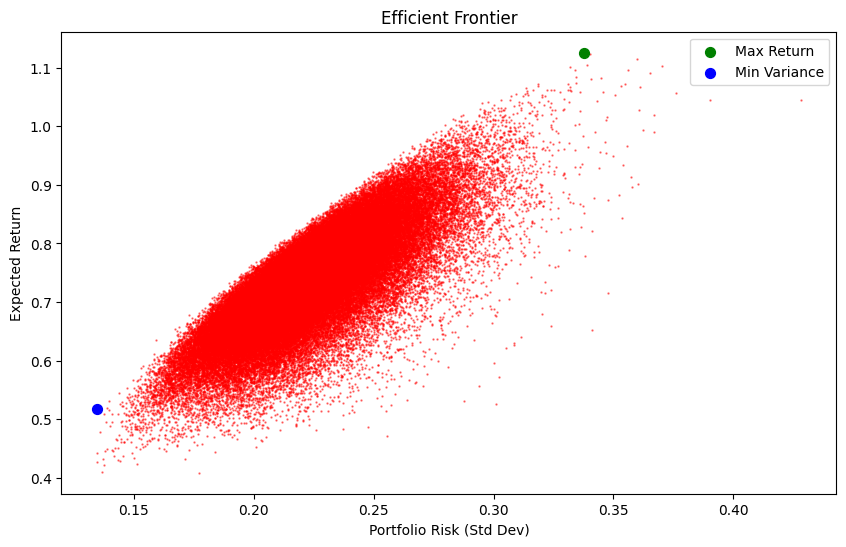

Max Return: 112.58%
Corresponding Standard Deviation: 0.3379
Optimal Weights: {'APP': np.float64(0.32712771842490074), 'ITUB': np.float64(0.022866274859516717), 'BKNG': np.float64(0.03392769997674318), 'MPLX': np.float64(0.06994018556272516), 'PDD': np.float64(0.2212727547013621), 'HLT': np.float64(0.005940854766122384), 'NVDA': np.float64(0.309345431777595), 'META': np.float64(0.0095790799310347)}


In [4]:
optimizer_for_high_profit = MPTOptimizer(mpt_stocks_for_profit, start_date=PROGRAM_START_DATE, end_date=PROGRAM_END_DATE)
optimizer_for_high_profit.simulate_portfolios()
optimizer_for_high_profit.plot_efficient_frontier()
optimal_profit_weights = optimizer_for_high_profit.find_optimal_weights()

optimizer_for_high_sharpe = MPTOptimizer(mpt_stocks_for_sharpe, start_date=PROGRAM_START_DATE, end_date=PROGRAM_END_DATE)
optimizer_for_high_sharpe.simulate_portfolios()
optimizer_for_high_sharpe.plot_efficient_frontier()
optimal_sharpe_weights = optimizer_for_high_sharpe.find_optimal_weights()

In [5]:
print('----Begining Back Test----')
print(f'Back Test starts on: {backtest_start}')
print(f'Back Test ends on: {backtest_end}')

paper_value = 100_000


weights_for_profit = list(optimal_profit_weights.values())

# Run the backtest
print('\nBack Test on High Profitable Stocks')
backtest_on_high_profit = backtest_portfolio(mpt_stocks_for_profit, paper_value, weights_for_profit, start_date=backtest_start, end_date=backtest_end)
print(f'Ending Value: {round(backtest_on_high_profit, 2)}')

print('\nBack Test on High Sharpe Stocks')
backtest_on_high_sharpe = backtest_portfolio(mpt_stocks_for_sharpe, paper_value, weights_for_profit, start_date=backtest_start, end_date=backtest_end)
print(f'Ending Value: {round(backtest_on_high_sharpe, 2)}')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

----Begining Back Test----
Back Test starts on: 2024-01-01
Back Test ends on: 2025-01-01 00:00:00

Back Test on High Profitable Stocks



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Ending Value: 216604.35

Back Test on High Sharpe Stocks
Ending Value: 254647.46


In [6]:
import pandas as pd
import os

# Define file path
file_path = f"{WORKSPACE_DIR}/portfolio_py/data/clean/backtest_results.csv"

# Check if file exists
if os.path.exists(file_path):
    # Load existing data
    backtest_df = pd.read_csv(file_path)
else:
    # Create a new DataFrame if the file doesn't exist
    backtest_df = pd.DataFrame(columns=[
        "Data_Collection_Start", "Data_Collection_End",
        "Backtest_Start", "Backtest_End",
        "Stock_Selection_Method", 'Stocks',"Starting_Value", "Ending_Value"
    ])

# New entries to append
new_entries = [
    {
        "Data_Collection_Start": PROGRAM_START_DATE,
        "Data_Collection_End": PROGRAM_END_DATE,
        "Backtest_Start": backtest_start,
        "Backtest_End": backtest_end,
        "Stock_Selection_Method": "High Profit Stocks",
        "Stocks": (",".join(mpt_stocks_for_profit)),
        "Starting_Value": paper_value,
        "Ending_Value": backtest_on_high_profit
    },
    {
        "Data_Collection_Start": PROGRAM_START_DATE,
        "Data_Collection_End": PROGRAM_END_DATE,
        "Backtest_Start": backtest_start,
        "Backtest_End": backtest_end,
        "Stock_Selection_Method": "High Sharpe Ratio Stocks",
        "Stocks": (",".join(mpt_stocks_for_sharpe)),
        "Starting_Value": paper_value,
        "Ending_Value": backtest_on_high_sharpe
    }
]

# Convert new entries to a DataFrame
new_entries_df = pd.DataFrame(new_entries)

# Drop duplicates before writing
backtest_df = pd.concat([backtest_df, new_entries_df], ignore_index=True).drop_duplicates()

# **Append** to the CSV without overwriting
backtest_df.to_csv(file_path, index=False, mode="w")  

print("New rows added successfully (without overwriting)!") 


New rows added successfully (without overwriting)!


In [7]:
backtest_df

,Data_Collection_Start,Data_Collection_End,Backtest_Start,Backtest_End,Stock_Selection_Method,Stocks,Starting_Value,Ending_Value
0,2020-01-01,2021-01-01,2021-01-01,2022-01-01,High Profit Stocks,"CNI,ISRG,HSBC,HLT,APD,VRSK,BKNG,META",100000,120839.156250
1,2020-01-01,2021-01-01,2021-01-01,2022-01-01,High Sharpe Ratio Stocks,"IDXX,ISRG,HLT,NVDA,NFLX,BKNG,APD,RY",100000,126140.027099
2,2020-01-01,2021-01-01,2021-01-01,2022-01-01 00:00:00,High Profit Stocks,"CNI,ISRG,HSBC,HLT,APD,VRSK,BKNG,META",100000,120839.156250
3,2020-01-01,2021-01-01,2021-01-01,2022-01-01 00:00:00,High Sharpe Ratio Stocks,"IDXX,ISRG,HLT,NVDA,NFLX,BKNG,APD,RY",100000,126140.027099
4,2021-01-01,2022-01-01,2022-01-01,2023-01-01 00:00:00,High Profit Stocks,"GOOGL,PLD,MSFT,SRE,CM,PAYX,SPG,BNS",100000,80609.275991
5,2021-01-01,2022-01-01,2022-01-01,2023-01-01 00:00:00,High Sharpe Ratio Stocks,"GOOGL,PLD,BMO,MSFT,SRE,EXR,CM,PAYX",100000,71373.878383
6,2022-01-01,2023-01-01,2023-01-01,2024-01-01 00:00:00,High Profit Stocks,"MPLX,VALE,NVO,TCOM,SRE,FICO,ITUB,PPERY",100000,132047.945969
7,2022-01-01,2023-01-01,2023-01-01,2024-01-01 00:00:00,High Sharpe Ratio Stocks,"VALE,WMB,NVO,TCOM,SRE,FICO,AFL,PPERY",100000,110032.021779
8,2023-01-01,2024-01-01,2024-01-01,2025-01-01 00:00:00,High Profit Stocks,"BKNG,ITUB,MPLX,ANET,HLT,PDD,NVDA,CPRT",100000,216604.352583
9,2023-01-01,2024-01-01,2024-01-01,2025-01-01 00:00:00,High Sharpe Ratio Stocks,"APP,ITUB,BKNG,MPLX,PDD,HLT,NVDA,META",100000,254647.463230
